<a href="https://colab.research.google.com/github/Aji-Use/Machine-Learning/blob/main/Praktikum2_G211210080.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library
import pandas as pd
import numpy as np
from google.colab import files
# Upload file
uploaded = files.upload()



Saving train.csv to train.csv


In [ ]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Cek kategorical columns
cat_col = [col for col in df.columns if df[col].dtype == object]
print ('Categorical Columns = ', cat_col)
num_col = [col for col in df.columns if df[col].dtype != object]
print ('Numerical Columns = ', num_col)


Categorical Columns =  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Columns =  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [ ]:
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [ ]:
df['Ticket'].unique()[:50]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

In [ ]:
# Drop name and ticket columns
df1 = df.drop(columns = ['Name', 'Ticket'])
df1.shape


(891, 10)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


Handling Missing Data

In [ ]:
round((df1.isnull().sum()/df1.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [ ]:
df2 = df1.drop(columns ='Cabin')
df2.dropna(subset=['Embarked'], axis=0, inplace=True)
df2.shape

(889, 9)

In [ ]:
# mean Imoutation
df3 = df2.fillna(df2.Age.mean())
# Lets check the null value again
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# Calculate summary statistic
mean = df3['Age'].mean()
std = df3['Age'].std()

# calculate the lower and upper bounds
lower_bounds = mean - std*2
upper_bounds = mean + std*2

print ('Lower Bound  = ', lower_bounds)
print ('Upper Bound  = ', upper_bounds)

df4 = df3[(df3['Age'] >= lower_bounds) & (df3['Age'] <= upper_bounds)]

Lower Bound  =  3.7054001079256587
Upper Bound  =  55.57878528533277


Handling Outliner

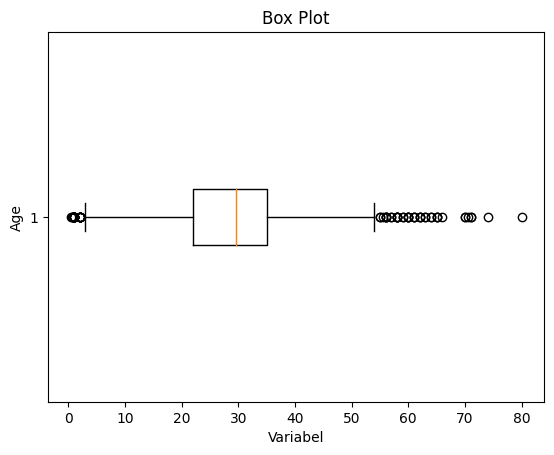

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot (df3['Age'], vert = False)
plt.xlabel ('Variabel')
plt.ylabel ('Age')
plt.title ('Box Plot')
plt.show()

Data Transformation

In [ ]:
X = df3[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Y = df3[['Survived']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

# Numerical Columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X

# Learning the statistical parameters for each of the data and transforming
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

<ipython-input-38-78c808584d5e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.271174,0.125,0.0,0.014151,S
1,0.0,female,0.472229,0.125,0.0,0.139136,C
2,1.0,female,0.321438,0.000,0.0,0.015469,S
3,0.0,female,0.434531,0.125,0.0,0.103644,S
4,1.0,male,0.434531,0.000,0.0,0.015713,S


Handlnng Imbalanced Data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Load Data
data = pd.read_csv('creditcard.csv')

# Print info columns in the data frame
# print (data.info())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
# Load Data
data = pd.read_csv('creditcard.csv')

# Print info columns in the data frame
# print (data.info())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Normalise the amount columns
data['normAmount'] = StandardScaler().fit_transform(np.array(data['Amount']).reshape(-1, 1))

# Drop Time and amount columns as they are not relevalnt for prediction purpose
data = data.drop(['Time', 'Amount'], axis = 1)

data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X = data.drop('Class', axis=1)
y = data['Class']
# split into 70 : 80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# describe info about train and test set
print ("Number transaction X_train dataset: ", X_train.shape)
print ("Number transaction y_train dataset: ", y_train.shape)
print ("Number transaction X_tes dataset: ", X_test.shape)
print ("Number transaction y_tes dataset: ", y_test.shape)

Number transaction X_train dataset:  (199364, 29)
Number transaction y_train dataset:  (199364,)
Number transaction X_tes dataset:  (85443, 29)
Number transaction y_tes dataset:  (85443,)


In [10]:
# logistic regression object
lr = LogisticRegression()

# train the model on train set
lr.fit(X_train, y_train.ravel())

predictions = lr.predict(X_test)

# print classification repot
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



Using SMOTE Algorithm

In [12]:
print ("Before OverSampling, counts of label '1' : {}".format(sum(y_train == 1)))
print ("Before OverSampling, counts of label '0' : {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you dont have imblearn)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = (X_train, y_train.ravel())

print ("After OverSampling, the shape of train_X: {}".format(X_train_res.shape))
print ("After OverSampling, the shape of train_y: {} \n".format(y_train_res.shape))

print ("After OverSampling, counts of label '1': {}".format(y_train_res == 1))
print ("After OverSampling, counts of label '0': {}".format(y_train_res == 0))


Before OverSampling, counts of label '1' : 345
Before OverSampling, counts of label '0' : 199019 

After OverSampling, the shape of train_X: (199364, 29)
After OverSampling, the shape of train_y: (199364,) 

After OverSampling, counts of label '1': [False False False ... False False False]
After OverSampling, counts of label '0': [ True  True  True ...  True  True  True]


In [14]:
lr1 = LogisticRegression()
lr1.fit(X_train, y_train_res.ravel())
predictions = lr1.predict(X_test)

# Print classification repot
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



NearMiss Algorithm

In [15]:
print ("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print ("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()

X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())

print ("After Undersampling, the shape of traain_X : {}".format(X_train_miss.shape))
print ("After Undersampling, the shape of traain_y': {} \n".format(y_train_miss.shape))

print ("Before Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print ("Before Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 345
Before Undersampling, counts of label '0': 199019 

After Undersampling, the shape of traain_X : (690, 29)
After Undersampling, the shape of traain_y': (690,) 

Before Undersampling, counts of label '1': 345
Before Undersampling, counts of label '0': 345


In [16]:
# train the model on train set
lr2 = LogisticRegression()
lr2.fit(X_train_miss, y_train_miss.ravel())
predictions = lr2.predict(X_test)

# Print classification report
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.55      0.71     85296
           1       0.00      0.95      0.01       147

    accuracy                           0.56     85443
   macro avg       0.50      0.75      0.36     85443
weighted avg       1.00      0.56      0.71     85443

